In [34]:
import numpy as np
import matplotlib.pyplot as plt
import tools

from data import temperature
from data import sample_HC
from data import err_sample_HC
from data import err_temperature

squared_temperature = temperature**2  # K**2
C_div_T = sample_HC/temperature  # mJ/K**2.mol
err_C_divT = err_sample_HC/temperature

In [36]:
print(dir(tools))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__warningregistry__', 'dev_schottky', 'dicho_1', 'main', 'maximum', 'np', 'plot', 'plot_schottky', 'plt', 'resol_nr', 'schottky', 'simpson', 'tab_interval', 'test']


In [6]:
# Constantes et tableaux

k = 1.380649e-23
delta = 2.9461005*k*2.4
temp = np.arange(0, 10, 1e-3)


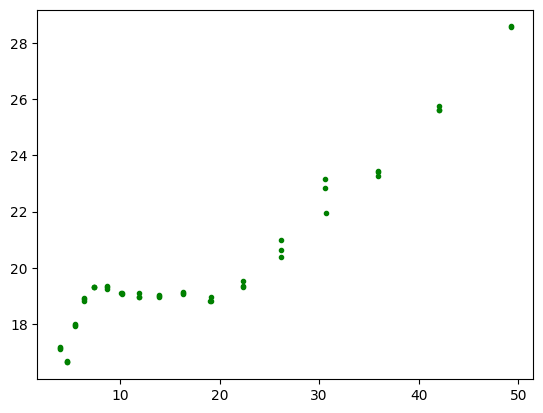

In [27]:
plt.figure()
plt.plot(squared_temperature[0:50], C_div_T[0:50], ".g")
plt.show()

/home/garance/Documents/internship_IMPMC/HPHT_YBCO_04_06/tools.py:110: RuntimeWarning: divide by zero encountered in divide
  
/home/garance/Documents/internship_IMPMC/HPHT_YBCO_04_06/tools.py:111: RuntimeWarning: overflow encountered in exp
  x = (E)/(k*T)
/home/garance/Documents/internship_IMPMC/HPHT_YBCO_04_06/tools.py:111: RuntimeWarning: overflow encountered in square
  x = (E)/(k*T)
/home/garance/Documents/internship_IMPMC/HPHT_YBCO_04_06/tools.py:111: RuntimeWarning: invalid value encountered in divide
  x = (E)/(k*T)


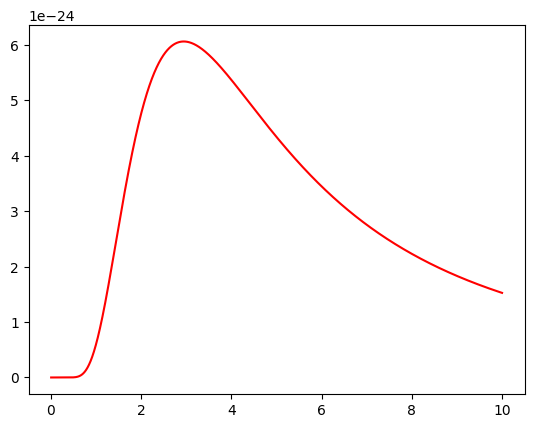

In [22]:
plt.figure()
plt.plot(temp, tools.schottky(temp, delta), "r")
plt.show()

In [24]:
T_eq = tools.max_schottky(squared_temperature, C_div_T, 0, 16)
E = tools.energie(squared_temperature, C_div_T,0, 16)

print(T_eq, E)

AttributeError: module 'tools' has no attribute 'max_schottky'